## Проблема качества данных. Будем угадывать вес человека по набору признаков.

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

#### Считаем датасет, в котором данные по людям (вес, рост, гендерный признак)

In [123]:
data = pd.read_csv( 'weight-height.csv' )
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Переведем показатели в кг.и см.

In [124]:
data['Height'] *= 2.54
data['Weight'] /= 2.205

In [125]:
data.head(3)

,Gender,Height,Weight
0,Male,187.571423,109.702296
1,Male,174.706036,73.610192
2,Male,188.239668,96.481114


#### Добавим в наш датасет еще один признак BMI (индекс массы человека)

In [126]:
data['bmi'] = data['Weight'] / (data['Height'] / 100) ** 2

#### Приведем все значения в INT

In [128]:
data['Height'] = data['Height'].astype(int)
data['Weight'] = data['Weight'].astype(int)
data['bmi'] = data['bmi'].astype(int)

In [129]:
data.head(3)

,Gender,Height,Weight,bmi
0,Male,187,109,31
1,Male,174,73,24
2,Male,188,96,27


### Добавим еще один признак "Соответствие между массой человека и его ростом"

- 0 - не норма
- 1 - норма

![alt text](bmi.png "Индекс массы тела")

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
Gender    10000 non-null object
Height    10000 non-null int64
Weight    10000 non-null int64
bmi       10000 non-null int64
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


#### Добавляем колонку bmi_cat где все значения в диапазоне 18 - 25 будут - True, остальные - False

In [132]:
data['bmi_cat'] = data['bmi'].between(18, 25)

In [135]:
data.head(3)

,Gender,Height,Weight,bmi,bmi_cat
0,Male,187,109,31,False
1,Male,174,73,24,True
2,Male,188,96,27,False


#### С помощью диаграмы мы видем что у нас 50% М. и 50% Ж.

<AxesSubplot:ylabel='Gender'>

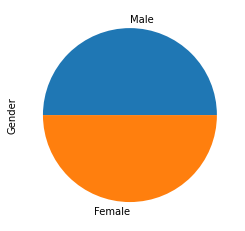

In [136]:
data.Gender.value_counts().plot(kind="pie", rot=0)

#### С помощью LabelEncoder закодируем значения признака Gender в 0 и 1

In [138]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit( data['Gender'] )


LabelEncoder()

In [139]:
data['Gender'] = encoder.transform( data['Gender'] ) 

In [140]:
data.head(3)

,Gender,Height,Weight,bmi,bmi_cat
0,1,187,109,31,False
1,1,174,73,24,True
2,1,188,96,27,False


#### Таким же способом переведем значения колонки bmi_cat в 0 и 1

In [141]:
encoder.fit( data['bmi_cat'] )
data['bmi_cat'] = encoder.transform( data['bmi_cat'] ) 

In [142]:
data.head(3)

,Gender,Height,Weight,bmi,bmi_cat
0,1,187,109,31,0
1,1,174,73,24,1
2,1,188,96,27,0


#### Попробуем обучить линейную модель на одном признаке bmi_cat  и предсказать bmi

In [149]:
from sklearn.metrics import mean_absolute_error

X = data[['bmi_cat']]
y = data['bmi']
reg = LinearRegression().fit(X, y)

print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Accuracy: {}'.format(reg.score(X, y)))

Weights: [-4.40477315]
Bias: 27.31623931623931
Error: 1.2377296693657212
Accuracy: 0.6580924196736693


####  Теперь попороубем в качесте признаков передать Height, Weight и bmi_cat

In [151]:
X = data[['Height', 'Weight', 'bmi_cat']]
y = data['bmi']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))
print('Accuracy: {}'.format(reg.score(X, y)))

Weights: [-0.30064322  0.35219679  0.00334117]
Bias: 49.88940027392091
Error: 0.3869730899286613
Accuracy: 0.9658648863378994


#### Итог. Мы увидели что на добавленных новых признакках качестве модели выше, а ошибка ниже.